In [113]:
import os
import shutil
import pickle
import navis
import numpy as np
import pandas as pd
from PIL import Image,ImageOps,ImageDraw, ImageFont
import nrrd# Some sample numpy
import plotly
import sys,os
sys.path.append( "D:/code/neuron-vis/neuronvis/neuronVis")
sys.path.append('D://code//neuron-vis/core/code')
import IONData as IONData
import SwcLoader as SwcLoader


import GenerateterminalMatrix as GenerateterminalMatrix
import matplotlib.pyplot as plt
from collections import Counter
import HierarchicalClustering as HierarchicalClustering
from Plot import tSNE_Plot as tSNE_Plot
from Plot import Clustering_Plot as Clustering_Plot

from Plot import Soma_Dotplot as Soma_Dotplot
from sklearn import manifold, datasets
from scipy.cluster import hierarchy
import seaborn as sns
%matplotlib inline
iondata=IONData.IONData()
tree=SwcLoader.NeuronTree()
generatematrix=GenerateterminalMatrix.GenerateterminalMatrix()
clustering=HierarchicalClustering.HierarchicalClustering()
tsneplot=tSNE_Plot()
clusteringplot=Clustering_Plot()
 


# **# 绘制terminal**

In [114]:
#绘制terminal
import sys, copy, os
sys.path.append("D:/neuron-vis/neuronVis")
sys.path.append("D:/neuron-vis/neuronVis/resource")
import IONData as IONData
import BrainRegion as BR
import SwcLoader
import Scene
import Visual as nv
import FlatNeuron
import Flatmap
import BoundLaplace
from skimage import draw, io
from pathlib import Path
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
"""PAL+STD nrrd"""
import BrainRegion
# br=BrainRegion.BrainRegion()
# br.praseJson()
# regionlist=br.getRegionList('STRd')
# id_DORpm_STR = [x[1] for x in regionlist if x[0]=='STRd'][0]
# nrrdpath_STR = iondata.getStructureMask(id_DORpm_STR)[1]
# print(nrrdpath_STR)
regionlist=br.getRegionList('PAL')
id_DORpm_PAL = [x[1] for x in regionlist if x[0]=='PAL'][0]
nrrdpath_PAL = iondata.getStructureMask(id_DORpm_PAL)[1]
print(nrrdpath_PAL)

import nrrd

STR_nrrd, STR_header = nrrd.read(nrrdpath_STR, index_order='F')
PAL_nrrd, PAL_header = nrrd.read(nrrdpath_PAL, index_order='F')
# nrrd.write("D:\code/neuron-vis/neuron-vis-wxf/neuronVis\structrue/structure_striatum.nrrd", STR_nrrd, header = STR_header)
nrrd.write("D:\code/neuron-vis/neuron-vis-wxf/neuronVis\structrue/structure_PAL.nrrd", PAL_nrrd, header = PAL_header)

D:/code/neuron-vis/neuronvis/neuronVis/../resource/strcture/structure_803.nrrd


In [5]:
"""MO+ACA nrrd"""
import BrainRegion
br=BrainRegion.BrainRegion()
br.praseJson()
regionlist=br.getRegionList('MO')
id_DORpm_MO = [x[1] for x in regionlist if x[0]=='MO'][0]
nrrdpath_MO = iondata.getStructureMask(id_DORpm_MO)[1]
print(nrrdpath_MO)
regionlist=br.getRegionList('ACA')
id_DORpm_ACA = [x[1] for x in regionlist if x[0]=='ACA'][0]
nrrdpath_ACA = iondata.getStructureMask(id_DORpm_ACA)[1]
print(nrrdpath_ACA)

import nrrd

ACA_nrrd, ACA_header = nrrd.read(nrrdpath_ACA, index_order='F')
MO_nrrd, MO_header = nrrd.read(nrrdpath_MO, index_order='F')
cortex_nrrd = ACA_nrrd.astype(np.uint8) + MO_nrrd.astype(np.uint8)
nrrd.write("D:\code/neuron-vis/neuron-vis-wxf/neuronVis\structrue/structure_aca.nrrd", ACA_nrrd, header = ACA_header)
nrrd.write("D:\code/neuron-vis/neuron-vis-wxf/neuronVis\structrue/structure_mo.nrrd", MO_nrrd, header = MO_header)
nrrd.write("D:\code/neuron-vis/neuron-vis-wxf/neuronVis\structrue/structure_cortex.nrrd", cortex_nrrd, header = MO_header)

D:/code/neuron-vis/neuronvis/neuronVis/../resource/strcture/structure_500.nrrd
D:/code/neuron-vis/neuronvis/neuronVis/../resource/strcture/structure_31.nrrd


In [116]:
import nrrd

iondata = IONData.IONData()
br = BR.BrainRegion()
br.praseJson()
regionlist_STR = br.getRegionList('STRd')
regionlist_PAL = br.getRegionList('PAL')
regionlist_MO = br.getRegionList('MO')
regionlist_ACA = br.getRegionList('ACA')

regionlist = regionlist_MO+regionlist_ACA
print(regionlist)

iondata = IONData.IONData()
structure_STR, header = nrrd.read("D:\code/neuron-vis/neuron-vis-wxf/neuronVis\structrue/structure_striatum.nrrd")
structure_PAL, header = nrrd.read("D:\code/neuron-vis/neuron-vis-wxf/neuronVis\structrue/structure_PAL.nrrd")
structure_cortex, header = nrrd.read("D:\code/neuron-vis/neuron-vis-wxf/neuronVis\structrue/structure_cortex.nrrd")

def get_edge_terminal_inBR(neuronlist, structure_path):
    structure_SC, header = nrrd.read(structure_path)
    SC_edge_PT_1 = {}
    SC_terminal_PT_1 = {}
    for n in neuronlist:
        #n = "202568001.swc"
        soma = iondata.getNeuronPropertyByID(n[:6], n[6:])['somapoint']
        if soma[2] > 5695: 
            neuron_tree = SwcLoader.NeuronTree()
            swc = iondata.getNeuronByID(n[:6], n[-7:])
            neuron_tree.readSWC(swc)
            for p in neuron_tree.points:
                p.xyz[2] = 11400 - p.xyz[2]
        else:
            neuron_tree = SwcLoader.NeuronTree()
            swc = iondata.getNeuronByID(n[:6],n[-7:])
            neuron_tree.readSWC(swc)
            
        newneuron=SwcLoader.NeuronTree()
        neuronedges=[]
        neuronterminals = []
        for edge in neuron_tree.edges:
            newedge = SwcLoader.Edge()
            for p in edge.data: 
                #print(p)   
                if p.x<13200 and p.y<8000 and p.z <11400 and structure_SC[int(p.x/10), int(p.y/10), int(p.z/10)]:  
                    #print(p)
                    newedge.data.append(p)
            if len(newedge.data)>1:
                neuronedges.append(newedge)

            ter = edge.data[-1]
            if ter.x<13200 and ter.y<8000 and ter.z <11400 and structure_SC[int(ter.x/10), int(ter.y/10), int(ter.z/10)]:  
                    #print(p)
                neuronterminals.append(ter)
            SC_terminal_PT_1[n] = neuronterminals
        
        if not neuronedges==[]:
            newneuron.edges= neuronedges    
            newneuron.rootAxonEdge = newneuron.edges[0]
            newneuron.root=newneuron.edges[0].data[0]
            SC_edge_PT_1[n]=newneuron
    
    SC_terminal_points_PT_1 = {}
    for k, v in SC_terminal_PT_1.items():
        tmp_list = []
        for p in v:
            tmp = []
            tmp.append(p.xyz[0])
            tmp.append(p.xyz[1])
            tmp.append(p.xyz[2])
            tmp_list.append(tmp)
        SC_terminal_points_PT_1[k] = tmp_list

    return SC_edge_PT_1, SC_terminal_points_PT_1


[['MO', 500], ['MO1', 107], ['MO2/3', 219], ['MO5', 299], ['MO6a', 644], ['MO6b', 947], ['MOp', 985], ['MOp1', 320], ['MOp2/3', 943], ['MOp5', 648], ['MOp6a', 844], ['MOp6b', 882], ['MOs', 993], ['MOs1', 656], ['MOs2/3', 962], ['MOs5', 767], ['MOs6a', 1021], ['MOs6b', 1085], ['ACA', 31], ['ACA1', 572], ['ACA2/3', 1053], ['ACA5', 739], ['ACA6a', 179], ['ACA6b', 227], ['ACAd', 39], ['ACAd1', 935], ['ACAd2/3', 211], ['ACAd5', 1015], ['ACAd6a', 919], ['ACAd6b', 927], ['ACAv', 48], ['ACAv1', 588], ['ACAv2/3', 296], ['ACAv5', 772], ['ACAv6a', 810], ['ACAv6b', 819]]


In [75]:
import Scene
import pandas as pd
tnc_scene=Scene.scene2List("E:/neuroview/data/scene/geneTnc.nv")
tnc_scene=pd.DataFrame(tnc_scene)
tnclist=list(tnc_scene['sampleid']+tnc_scene['name'])
calb_scene=Scene.scene2List("E:/neuroview/data/scene/genecalb1.nv")
calb_scene=pd.DataFrame(calb_scene)
calblist=list(calb_scene['sampleid']+calb_scene['name'])
calb_tnc_list=tnclist+calblist

In [ ]:
tnc_STR_edge, tnc_STR_terminal_points = get_edge_terminal_inBR(tnclist, "D:\code/neuron-vis/neuron-vis-wxf/neuronVis\structrue/structure_striatum.nrrd")
calb_STR_edge, calb_STR_terminal_points = get_edge_terminal_inBR(calblist, "D:\code/neuron-vis/neuron-vis-wxf/neuronVis\structrue/structure_striatum.nrrd")


In [ ]:
tnc_PAL_edge, tnc_PAL_terminal_points = get_edge_terminal_inBR(tnclist, "D:\code/neuron-vis/neuron-vis-wxf/neuronVis\structrue/structure_PAL.nrrd")
calb_PAL_edge, calb_PAL_terminal_points = get_edge_terminal_inBR(calblist, "D:\code/neuron-vis/neuron-vis-wxf/neuronVis\structrue/structure_PAL.nrrd")

In [ ]:
tnc_cortex_edge, tnc_cortex_terminal_points = get_edge_terminal_inBR(tnclist, "D:\code/neuron-vis/neuron-vis-wxf/neuronVis\structrue/structure_cortex.nrrd")
calb_cortex_edge, calb_cortex_terminal_points = get_edge_terminal_inBR(calblist, "D:\code/neuron-vis/neuron-vis-wxf/neuronVis\structrue/structure_cortex.nrrd")

In [ ]:
tnc_SI_edge, tnc_SI_terminal_points = get_edge_terminal_inBR(tnclist, "D:\code/neuron-vis/neuron-vis-wxf/neuronVis\structrue/structure_SI.nrrd")

In [ ]:
tnc_MO_edge, tnc_MO_terminal_points = get_edge_terminal_inBR(tnclist, "D:\code/neuron-vis/neuron-vis-wxf/neuronVis\structrue/structure_mo.nrrd")
calb_MO_edge, calb_MO_MO_points = get_edge_terminal_inBR(calblist, "D:\code/neuron-vis/neuron-vis-wxf/neuronVis\structrue/structure_mo.nrrd")
tnc_ACA_edge, tnc_ACA_terminal_points = get_edge_terminal_inBR(tnclist, "D:\code/neuron-vis/neuron-vis-wxf/neuronVis\structrue/structure_aca.nrrd")
calb_ACA_edge, calb_MO_ACA_points = get_edge_terminal_inBR(calblist, "D:\code/neuron-vis/neuron-vis-wxf/neuronVis\structrue/structure_aca.nrrd")

In [130]:
import GeometryAdapter


def draw_points(visul,points,colors):
    ga = GeometryAdapter.GeometryAdapter()
    ga.geometry.drawModel='points'
    tmp = 0
    for i,j in zip(points,colors):
        # print(i,j)
        ga.geometry.addPoint(i,j)
        ga.geometry.addIndex(tmp)
        tmp += 1
    ga.geometry.type = 1
    visul.render.addGeometry(ga.geometry)

neuronvis=nv.neuronVis(size=(2000, 2200), renderModel=1)
neuronvis.render.setBackgroundColor((1.0,1.00,1.0,100.0))
neuronvis.render.setLookAt((5000,0,15000),(2000,0,0),(0,-300,0))
neuronvis.render.setView(type='reset')
neuronvis.render.setClip(True)
neuronvis.clear(root=True)

# colormap=[[0,0.5,1],[0.54,0.1,0.1],[1,0.55,0],[1,0.55,0]]
# neuronvis.addRegion('STRd',[0.64, 0.64, 0.61])
# for k, v in tnc_STR_terminal_points.items():
#     color_list = []
#     for i in range(len(tnc_STR_terminal_points[k])):    
#         color_list.append([0.29, 0.6, 1])
#     draw_points(neuronvis, tnc_STR_terminal_points[k], color_list)
#     neuronvis.render.setPointSize(2)
#     # neuronvis.clear(root = True)
# for k, v in calb_STR_terminal_points.items():
#     color_list = []
#     for i in range(len(calb_STR_terminal_points[k])):    
#         color_list.append([0.67, 0, 0])
#     draw_points(neuronvis, calb_STR_terminal_points[k], color_list)
#     neuronvis.render.setPointSize(2)
# neuronvis.render.savepng("D:/Figure/25/Figure3/tncneuronterminal_inPAL/" + k + "_terminal_R.png")

# neuronvis.addRegion('PALd',[0.64, 0.64, 0.61])
# neuronvis.addRegion('PALv',[0.64, 0.64, 0.61])
# neuronvis.addRegion('PALc',[0.64, 0.64, 0.61])
# for k, v in tnc_PAL_terminal_points.items():
#     color_list = []
#     for i in range(len(tnc_PAL_terminal_points[k])):    
#         color_list.append([0.29, 0.6, 1])
#     draw_points(neuronvis, tnc_PAL_terminal_points[k], color_list)
#     neuronvis.render.setPointSize(2)
#     # neuronvis.clear(root = True)
# for k, v in calb_PAL_terminal_points.items():
#     color_list = []
#     for i in range(len(calb_PAL_terminal_points[k])):    
#         color_list.append([0.67, 0, 0])
#     draw_points(neuronvis, calb_PAL_terminal_points[k], color_list)
#     neuronvis.render.setPointSize(2)
# neuronvis.render.savepng("D:/Figure/25/Figure3/tncneuronterminal_inPAL/" + k + "_terminal_R.png")


neuronvis.addRegion('SI',[0.64, 0.64, 0.61])
for k, v in tnc_SI_terminal_points.items():
    color_list = []
    for i in range(len(tnc_SI_terminal_points[k])):    
        color_list.append([0.29, 0.6, 1])
    draw_points(neuronvis, tnc_SI_terminal_points[k], color_list)
    neuronvis.render.setPointSize(5)
    # neuronvis.clear(root = True)

neuronvis.render.savepng("D:/Figure/25/Figure4/tncneuronterminal_inSI/" + k + "_terminal_R.png")

In [44]:
neuronvis.addRegion('MOp',[0.64, 0.64, 0.61])
neuronvis.addRegion('MOs',[0.64, 0.64, 0.61])
neuronvis.addRegion('ACA',[0.64, 0.64, 0.61])
for k, v in tnc_cortex_terminal_points.items():
    color_list = []
    for i in range(len(tnc_cortex_terminal_points[k])):    
        color_list.append([0.29, 0.6, 1])
    draw_points(neuronvis, tnc_cortex_terminal_points[k], color_list)
    neuronvis.render.setPointSize(2)
    # neuronvis.clear(root = True)
for k, v in calb_cortex_terminal_points.items():
    color_list = []
    for i in range(len(calb_cortex_terminal_points[k])):    
        color_list.append([0.67, 0, 0])
    draw_points(neuronvis, calb_cortex_terminal_points[k], color_list)
    neuronvis.render.setPointSize(4)
neuronvis.render.savepng("D:/Figure/25/Figure3/tncneuronterminal_incortex/" + k + "anterior.png")

# for k, v in tnc_MO_terminal_points.items():
#     color_list = []
#     for i in range(len(tnc_MO_terminal_points[k])):    
#         color_list.append([0.29, 0.6, 1])
#     draw_points(neuronvis, tnc_MO_terminal_points[k], color_list)
#     neuronvis.render.setPointSize(2)
#     # neuronvis.clear(root = True)
# for k, v in calb_MO_MO_points.items():
#     color_list = []
#     for i in range(len(calb_MO_MO_points[k])):    
#         color_list.append([0.67, 0, 0])
#     draw_points(neuronvis, calb_MO_MO_points[k], color_list)
#     neuronvis.render.setPointSize(4)
# neuronvis.render.savepng("D:/Figure/25/Figure3/tncneuronterminal_MO/" + k + "anterior.png")

In [3]:
neuronlist=calblist
left_neuronlist=[]
for n in neuronlist:
    somaposition=iondata.getNeuronPropertyByID(n[:6],n[6:])['somapoint']
    if somaposition[2]<5700:
        left_neuronlist.append(n)
        
import GenerateMatrix as GenerateMatrix        
generatematrix=GenerateMatrix.GenerateMatrix()
generatematrix.generate_terminal_matrix(neuronlist,st_level=8,flip=None,normalized=False,terminal=False)
calb_axon=generatematrix.terminaldata

json_error=calb_axon.sum()[calb_axon.sum()==0]
print('error in json',json_error)
#需要翻转的左侧神经元
left_neuronlist_tem=[x for x in calb_axon.columns if x in left_neuronlist]

#对左侧脑内神经元进行翻转
left_region=[x for x in calb_axon.index if 'left' in x]
right_region=[x for x in calb_axon.index if 'right' in x]

for n in left_neuronlist_tem:
    # print(n)
    left_tem=calb_axon.loc[left_region,n]
    right_tem=calb_axon.loc[right_region,n]
    calb_axon.loc[left_region,n]=list(right_tem)
    calb_axon.loc[right_region,n]=list(left_tem.values)
region_st5_all=['Isocortex',
         'OLF',
         'HPF',
         'CTXsp',
         'STR',
         'PAL',
         'TH',
         'HY',
         'MB',
         'P',
         'MY',
         'CBX',
         'CBN']
 
primary_region=[x for x in calb_axon.index if not x[:x.index('.')] in region_st5_all]
calb_axon=calb_axon.loc[primary_region]
shortneuron=calb_axon.sum()[calb_axon.sum()<3000].index.to_list()
longneuron=[x for x in calb_axon.columns if not x in shortneuron]

calb_axon_screen=calb_axon
calb_axon_screen=calb_axon_screen[calb_axon_screen>500]#
calb_axon_screen=calb_axon_screen.dropna(axis=0,how='all')
calb_axon_screen=calb_axon_screen.fillna(0)
calb_axon_screen=calb_axon_screen.astype(float)

region_tem=(calb_axon_screen>0).sum(axis=1)
region_tem=region_tem[region_tem>3].index.to_list()
calb_axon_screen=calb_axon_screen.loc[region_tem]



calb_axon_screen_norm=calb_axon_screen/calb_axon_screen.sum()
for b in calb_axon_screen_norm.loc[:,calb_axon_screen_norm.isnull().all()].columns:
    del calb_axon_screen_norm[b]
    del calb_axon_screen[b]

calb_axon_screen=np.log(calb_axon_screen+1)
calb_axon_screen



221624012.swc
221624013.swc
221624040.swc
221624044.swc
221624045.swc
221624046.swc
221624047.swc
221624048.swc
221624050.swc
221624051.swc
221624053.swc
221624054.swc
221624084.swc
221624085.swc
221624097.swc
221624169.swc
221624170.swc
221624179.swc
221624180.swc
221612003.swc
221612004.swc
221612006.swc
221612007.swc
221612008.swc
221612016.swc
221612018.swc
221612019.swc
221612020.swc
221612032.swc
221612033.swc
221612046.swc
221612062.swc
221612076.swc
221612077.swc
221612078.swc
221612079.swc
221612080.swc
error in json Series([], dtype: object)


,221624012.swc,221624013.swc,221624040.swc,221624044.swc,221624045.swc,221624046.swc,221624047.swc,221624048.swc,221624050.swc,221624051.swc,...,221612020.swc,221612032.swc,221612033.swc,221612046.swc,221612062.swc,221612076.swc,221612077.swc,221612078.swc,221612079.swc,221612080.swc
AI.right,9.181693,6.257985,0.000000,0.000000,0.000000,0.000000,0.000000,6.651058,0.000000,0.000000,...,7.300131,10.638285,9.663251,0.000000,0.000000,7.004679,7.879781,0.000000,7.977130,8.470210
MOp.right,6.798153,0.000000,8.283783,7.981909,0.000000,0.000000,6.824237,0.000000,7.545259,0.000000,...,11.303882,10.045486,6.397253,0.000000,9.029822,9.226618,7.940406,0.000000,0.000000,0.000000
MOs.right,8.102059,0.000000,7.508947,7.640553,9.919376,0.000000,7.421718,9.407368,8.055477,0.000000,...,9.016981,10.619039,8.204159,10.909412,10.823681,9.925486,11.627198,9.282250,10.386107,9.004292
ORB.right,7.989685,0.000000,0.000000,0.000000,0.000000,0.000000,8.729587,7.172867,0.000000,0.000000,...,0.000000,7.960716,7.824862,0.000000,0.000000,7.757443,7.576736,0.000000,0.000000,6.555227
GU.right,0.000000,0.000000,0.000000,0.000000,6.337532,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,8.374893,7.516577,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SSp.right,0.000000,0.000000,0.000000,6.961797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.688733,0.000000,0.000000,0.000000,0.000000,9.045389,0.000000,0.000000,0.000000,0.000000
SSs.right,0.000000,0.000000,0.000000,0.000000,6.326040,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.656413,0.000000,6.779432,8.031216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ACA.right,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.622147,0.000000,7.497111,0.000000,...,7.000598,0.000000,0.000000,0.000000,0.000000,9.965920,9.228171,9.121805,0.000000,8.738181
PL.right,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.605138,0.000000,0.000000,0.000000,...,6.711080,0.000000,0.000000,0.000000,7.066045,8.331127,8.157825,8.571310,7.836500,8.314425
FRP.right,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.464403,0.000000,0.000000,6.820675,8.138640,0.000000,7.530012,0.000000,7.228261,0.000000


In [4]:
neuronlist=tnclist
left_neuronlist=[]
for n in neuronlist:
    somaposition=iondata.getNeuronPropertyByID(n[:6],n[6:])['somapoint']
    if somaposition[2]<5700:
        left_neuronlist.append(n)
        
import GenerateMatrix as GenerateMatrix        
generatematrix=GenerateMatrix.GenerateMatrix()
generatematrix.generate_terminal_matrix(neuronlist,st_level=8,flip=None,normalized=False,terminal=False)
tnc_axon=generatematrix.terminaldata

json_error=tnc_axon.sum()[tnc_axon.sum()==0]
print('error in json',json_error)
#需要翻转的左侧神经元
left_neuronlist_tem=[x for x in tnc_axon.columns if x in left_neuronlist]

#对左侧脑内神经元进行翻转
left_region=[x for x in tnc_axon.index if 'left' in x]
right_region=[x for x in tnc_axon.index if 'right' in x]

for n in left_neuronlist_tem:
    # print(n)
    left_tem=tnc_axon.loc[left_region,n]
    right_tem=tnc_axon.loc[right_region,n]
    tnc_axon.loc[left_region,n]=list(right_tem)
    tnc_axon.loc[right_region,n]=list(left_tem.values)
region_st5_all=['Isocortex',
         'OLF',
         'HPF',
         'CTXsp',
         'STR',
         'PAL',
         'TH',
         'HY',
         'MB',
         'P',
         'MY',
         'CBX',
         'CBN']
 
primary_region=[x for x in tnc_axon.index if not x[:x.index('.')] in region_st5_all]
tnc_axon=tnc_axon.loc[primary_region]
shortneuron=tnc_axon.sum()[tnc_axon.sum()<3000].index.to_list()
longneuron=[x for x in tnc_axon.columns if not x in shortneuron]

tnc_axon_screen=tnc_axon
tnc_axon_screen=tnc_axon_screen[tnc_axon_screen>500]#
tnc_axon_screen=tnc_axon_screen.dropna(axis=0,how='all')
tnc_axon_screen=tnc_axon_screen.fillna(0)
tnc_axon_screen=tnc_axon_screen.astype(float)

region_tem=(tnc_axon_screen>0).sum(axis=1)
region_tem=region_tem[region_tem>3].index.to_list()
tnc_axon_screen=tnc_axon_screen.loc[region_tem]



tnc_axon_screen_norm=tnc_axon_screen/tnc_axon_screen.sum()
for b in tnc_axon_screen_norm.loc[:,tnc_axon_screen_norm.isnull().all()].columns:
    del tnc_axon_screen_norm[b]
    del tnc_axon_screen[b]

tnc_axon_screen=np.log(tnc_axon_screen+1)
tnc_axon_screen


231628005.swc
231628007.swc
231628008.swc
231628011.swc
231628012.swc
231628014.swc
231628015.swc
231628017.swc
231628018.swc
231628029.swc
231628031.swc
231628033.swc
231629006.swc
231629008.swc
231629009.swc
231629010.swc
231629020.swc
231629030.swc
231630004.swc
231630005.swc
231630006.swc
231630008.swc
231630009.swc
231630010.swc
231630011.swc
231630012.swc
231630013.swc
231630017.swc
231630023.swc
231630024.swc
231630025.swc
231630027.swc
231630028.swc
231630029.swc
231630030.swc
231630031.swc
error in json Series([], dtype: object)


,231628005.swc,231628007.swc,231628008.swc,231628011.swc,231628012.swc,231628014.swc,231628015.swc,231628017.swc,231628018.swc,231628029.swc,...,231630013.swc,231630017.swc,231630023.swc,231630024.swc,231630025.swc,231630027.swc,231630028.swc,231630029.swc,231630030.swc,231630031.swc
MOp.right,7.563396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.954457,0.000000,0.000000,7.298427,0.000000,6.895602
MOs.right,7.278429,0.000000,8.311738,0.000000,6.440149,0.000000,8.939738,0.000000,0.000000,0.000000,...,0.000000,0.000000,6.242712,0.000000,8.808869,0.000000,0.000000,8.498266,7.841986,8.231978
SSp.right,6.400540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.508198,0.000000,0.000000,0.000000,0.000000,7.888817
ACA.right,0.000000,0.000000,7.038607,0.000000,8.843732,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.850139,6.762511,0.000000,0.000000,8.276371,8.203598,8.013163,8.877435
ORB.right,0.000000,0.000000,6.547727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.511804
PL.right,0.000000,0.000000,6.493521,0.000000,6.456611,0.000000,7.238028,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.797906,0.000000,0.000000,6.788835,6.784556,0.000000,7.375941
RSP.right,0.000000,0.000000,0.000000,0.000000,8.213007,0.000000,0.000000,0.000000,0.000000,7.987657,...,0.000000,0.000000,0.000000,9.476120,0.000000,0.000000,0.000000,7.346413,0.000000,7.284241
AON.right,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.440793,0.000000,0.000000,...,0.000000,6.634392,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENT.right,0.000000,0.000000,0.000000,0.000000,9.384308,0.000000,0.000000,0.000000,0.000000,9.503929,...,0.000000,0.000000,0.000000,7.316068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PAR.right,0.000000,0.000000,0.000000,0.000000,10.847125,0.000000,0.000000,0.000000,0.000000,10.811493,...,0.000000,0.000000,0.000000,10.225935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
neuronlist=calblist

left_neuronlist=[]
for n in neuronlist:
    somaposition=iondata.getNeuronPropertyByID(n[:6],n[6:])['somapoint']
    if somaposition[2]<5700:
        left_neuronlist.append(n)
        

import GenerateterminalMatrix as GenerateterminalMatrix        
generateterminalMatrix=GenerateterminalMatrix.GenerateterminalMatrix()
generateterminalMatrix.generate_terminal_matrix(neuronlist,st_level=8,flip=None,normalized=False)
calb_terminal=generateterminalMatrix.terminaldata

json_error=calb_terminal.sum()[calb_terminal.sum()==0]
print('error in json',json_error)
#需要翻转的左侧神经元
left_neuronlist_tem=[x for x in calb_terminal.columns if x in left_neuronlist]

#对左侧脑内神经元进行翻转
left_region=[x for x in calb_terminal.index if 'left' in x]
right_region=[x for x in calb_terminal.index if 'right' in x]

for n in left_neuronlist_tem:
    # print(n)
    left_tem=calb_terminal.loc[left_region,n]
    right_tem=calb_terminal.loc[right_region,n]
    calb_terminal.loc[left_region,n]=list(right_tem)
    calb_terminal.loc[right_region,n]=list(left_tem.values)
region_st5_all=['Isocortex',
         'OLF',
         'HPF',
         'CTXsp',
         'STR',
         'PAL',
         'TH',
         'HY',
         'MB',
         'P',
         'MY',
         'CBX',
         'CBN']
 
primary_region=[x for x in calb_terminal.index if not x[:x.index('.')] in region_st5_all]
calb_terminal=calb_terminal.loc[primary_region]
shortneuron=calb_terminal.sum()[calb_terminal.sum()<3000].index.to_list()
longneuron=[x for x in calb_terminal.columns if not x in shortneuron]

calb_terminal_screen=calb_terminal
calb_terminal_screen=calb_terminal_screen[calb_terminal_screen>5]#
calb_terminal_screen=calb_terminal_screen.dropna(axis=0,how='all')
calb_terminal_screen=calb_terminal_screen.fillna(0)
calb_terminal_screen=calb_terminal_screen.astype(float)

region_tem=(calb_terminal_screen>0).sum(axis=1)
region_tem=region_tem[region_tem>3].index.to_list()
calb_terminal_screen=calb_terminal_screen.loc[region_tem]



calb_terminal_screen_norm=calb_terminal_screen/calb_terminal_screen.sum()
for b in calb_terminal_screen_norm.loc[:,calb_terminal_screen_norm.isnull().all()].columns:
    del calb_terminal_screen_norm[b]
    del calb_terminal_screen[b]

calb_terminal_screen


221624012.swc
221624013.swc
221624040.swc
221624044.swc
221624045.swc
221624046.swc
221624047.swc
221624048.swc
221624050.swc
221624051.swc
221624053.swc
221624054.swc
221624084.swc
221624085.swc
221624097.swc
221624169.swc
221624170.swc
221624179.swc
221624180.swc
221612003.swc
221612004.swc
221612006.swc
221612007.swc
221612008.swc
221612016.swc
221612018.swc
221612019.swc
221612020.swc
221612032.swc
221612033.swc
221612046.swc
221612062.swc
221612076.swc
221612077.swc
221612078.swc
221612079.swc
221612080.swc
error in json Series([], dtype: object)


,221624012.swc,221624013.swc,221624040.swc,221624044.swc,221624045.swc,221624046.swc,221624047.swc,221624048.swc,221624050.swc,221624051.swc,...,221612020.swc,221612032.swc,221612033.swc,221612046.swc,221612062.swc,221612076.swc,221612077.swc,221612078.swc,221612079.swc,221612080.swc
AI.right,118.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,...,0.0,115.0,63.0,0.0,0.0,0.0,8.0,0.0,12.0,17.0
MOp.right,15.0,0.0,43.0,19.0,0.0,0.0,0.0,0.0,22.0,0.0,...,256.0,89.0,0.0,0.0,25.0,37.0,0.0,0.0,0.0,0.0
MOs.right,53.0,0.0,16.0,15.0,283.0,0.0,10.0,109.0,13.0,0.0,...,28.0,105.0,18.0,237.0,237.0,42.0,372.0,22.0,134.0,16.0
ORB.right,22.0,0.0,0.0,0.0,0.0,0.0,155.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SSp.right,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,149.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
SSs.right,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,16.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
ACA.right,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,67.0,20.0,31.0,0.0,14.0
PL.right,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,17.0,17.0,17.0,16.0
FRP.right,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,14.0,0.0,0.0,0.0,6.0,0.0
EP.right,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,23.0,0.0


In [6]:
neuronlist=tnclist
left_neuronlist=[]
for n in neuronlist:
    somaposition=iondata.getNeuronPropertyByID(n[:6],n[6:])['somapoint']
    if somaposition[2]<5700:
        left_neuronlist.append(n)
import GenerateterminalMatrix as GenerateterminalMatrix        
generateterminalMatrix=GenerateterminalMatrix.GenerateterminalMatrix()
generateterminalMatrix.generate_terminal_matrix(neuronlist,st_level=8,flip=None,normalized=False)
tnc_terminal=generateterminalMatrix.terminaldata

json_error=tnc_terminal.sum()[tnc_terminal.sum()==0]
print('error in json',json_error)
#需要翻转的左侧神经元
left_neuronlist_tem=[x for x in tnc_terminal.columns if x in left_neuronlist]

#对左侧脑内神经元进行翻转
left_region=[x for x in tnc_terminal.index if 'left' in x]
right_region=[x for x in tnc_terminal.index if 'right' in x]

for n in left_neuronlist_tem:
    # print(n)
    left_tem=tnc_terminal.loc[left_region,n]
    right_tem=tnc_terminal.loc[right_region,n]
    tnc_terminal.loc[left_region,n]=list(right_tem)
    tnc_terminal.loc[right_region,n]=list(left_tem.values)
region_st5_all=['Isocortex',
         'OLF',
         'HPF',
         'CTXsp',
         'STR',
         'PAL',
         'TH',
         'HY',
         'MB',
         'P',
         'MY',
         'CBX',
         'CBN']
 
primary_region=[x for x in tnc_terminal.index if not x[:x.index('.')] in region_st5_all]
tnc_terminal=tnc_terminal.loc[primary_region]
shortneuron=tnc_terminal.sum()[tnc_terminal.sum()<3000].index.to_list()
longneuron=[x for x in tnc_terminal.columns if not x in shortneuron]

tnc_terminal_screen=tnc_terminal
tnc_terminal_screen=tnc_terminal_screen[tnc_terminal_screen>5]#
tnc_terminal_screen=tnc_terminal_screen.dropna(axis=0,how='all')
tnc_terminal_screen=tnc_terminal_screen.fillna(0)
tnc_terminal_screen=tnc_terminal_screen.astype(float)

region_tem=(tnc_terminal_screen>0).sum(axis=1)
region_tem=region_tem[region_tem>3].index.to_list()
tnc_terminal_screen=tnc_terminal_screen.loc[region_tem]



tnc_terminal_screen_norm=tnc_terminal_screen/tnc_terminal_screen.sum()
for b in tnc_terminal_screen_norm.loc[:,tnc_terminal_screen_norm.isnull().all()].columns:
    del tnc_terminal_screen_norm[b]
    del tnc_terminal_screen[b]

tnc_terminal_screen

231628005.swc
231628007.swc
231628008.swc
231628011.swc
231628012.swc
231628014.swc
231628015.swc
231628017.swc
231628018.swc
231628029.swc
231628031.swc
231628033.swc
231629006.swc
231629008.swc
231629009.swc
231629010.swc
231629020.swc
231629030.swc
231630004.swc
231630005.swc
231630006.swc
231630008.swc
231630009.swc
231630010.swc
231630011.swc
231630012.swc
231630013.swc
231630017.swc
231630023.swc
231630024.swc
231630025.swc
231630027.swc
231630028.swc
231630029.swc
231630030.swc
231630031.swc
error in json Series([], dtype: object)


,231628005.swc,231628007.swc,231628008.swc,231628011.swc,231628012.swc,231628014.swc,231628015.swc,231628017.swc,231628018.swc,231628029.swc,...,231630013.swc,231630017.swc,231630023.swc,231630024.swc,231630025.swc,231630027.swc,231630028.swc,231630029.swc,231630030.swc,231630031.swc
MOs.right,13.0,0.0,49.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,31.0,0.0,0.0,28.0,0.0,17.0
ACA.right,0.0,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.0,0.0,0.0,0.0,35.0,24.0,32.0,70.0
PL.right,0.0,0.0,0.0,0.0,7.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
RSP.right,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,52.0,0.0,0.0,0.0,21.0,0.0,38.0
SSp.right,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,212.0,0.0,0.0,0.0,0.0,34.0
PAR.right,0.0,0.0,0.0,0.0,1356.0,0.0,0.0,0.0,0.0,748.0,...,0.0,0.0,0.0,424.0,0.0,0.0,0.0,0.0,0.0,0.0
PRE.right,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,292.0,...,0.0,0.0,0.0,198.0,0.0,0.0,0.0,0.0,0.0,0.0
CP.right,3683.0,19.0,1665.0,3760.0,0.0,3130.0,5106.0,19.0,166.0,0.0,...,659.0,276.0,1693.0,10.0,959.0,829.0,1979.0,2411.0,1506.0,903.0
ACB.right,0.0,1778.0,0.0,0.0,0.0,87.0,0.0,751.0,756.0,0.0,...,63.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GPe.right,833.0,0.0,0.0,47.0,0.0,85.0,134.0,0.0,0.0,0.0,...,9.0,18.0,21.0,0.0,158.0,19.0,44.0,38.0,44.0,36.0


In [76]:
neuronlist=calb_tnc_list
left_neuronlist=[]
for n in neuronlist:
    somaposition=iondata.getNeuronPropertyByID(n[:6],n[6:])['somapoint']
    if somaposition[2]<5700:
        left_neuronlist.append(n)
import GenerateterminalMatrix as GenerateterminalMatrix        
generateterminalMatrix=GenerateterminalMatrix.GenerateterminalMatrix()
generateterminalMatrix.generate_terminal_matrix(neuronlist,st_level=8,flip=None,normalized=False)
calbtnc_terminal=generateterminalMatrix.terminaldata

json_error=calbtnc_terminal.sum()[calbtnc_terminal.sum()==0]
print('error in json',json_error)
#需要翻转的左侧神经元
left_neuronlist_tem=[x for x in calbtnc_terminal.columns if x in left_neuronlist]

#对左侧脑内神经元进行翻转
left_region=[x for x in calbtnc_terminal.index if 'left' in x]
right_region=[x for x in calbtnc_terminal.index if 'right' in x]

for n in left_neuronlist_tem:
    # print(n)
    left_tem=calbtnc_terminal.loc[left_region,n]
    right_tem=calbtnc_terminal.loc[right_region,n]
    calbtnc_terminal.loc[left_region,n]=list(right_tem)
    calbtnc_terminal.loc[right_region,n]=list(left_tem.values)
region_st5_all=['Isocortex',
         'OLF',
         'HPF',
         'CTXsp',
         'STR',
         'PAL',
         'TH',
         'HY',
         'MB',
         'P',
         'MY',
         'CBX',
         'CBN']
 
primary_region=[x for x in calbtnc_terminal.index if not x[:x.index('.')] in region_st5_all]
calbtnc_terminal=calbtnc_terminal.loc[primary_region]
shortneuron=calbtnc_terminal.sum()[calbtnc_terminal.sum()<3000].index.to_list()
longneuron=[x for x in calbtnc_terminal.columns if not x in shortneuron]

calbtnc_terminal_screen=calbtnc_terminal
calbtnc_terminal_screen=calbtnc_terminal_screen[calbtnc_terminal_screen>5]#
calbtnc_terminal_screen=calbtnc_terminal_screen.dropna(axis=0,how='all')
calbtnc_terminal_screen=calbtnc_terminal_screen.fillna(0)
calbtnc_terminal_screen=calbtnc_terminal_screen.astype(float)

region_tem=(calbtnc_terminal_screen>0).sum(axis=1)
region_tem=region_tem[region_tem>3].index.to_list()
calbtnc_terminal_screen=calbtnc_terminal_screen.loc[region_tem]



calbtnc_terminal_screen_norm=calbtnc_terminal_screen/calbtnc_terminal_screen.sum()
for b in calbtnc_terminal_screen_norm.loc[:,calbtnc_terminal_screen_norm.isnull().all()].columns:
    del calbtnc_terminal_screen_norm[b]
    del calbtnc_terminal_screen[b]

calbtnc_terminal_screen

231628005.swc
231628007.swc
231628008.swc
231628011.swc
231628012.swc
231628014.swc
231628015.swc
231628017.swc
231628018.swc
231628029.swc
231628031.swc
231628033.swc
231629006.swc
231629008.swc
231629009.swc
231629010.swc
231629020.swc
231629030.swc
231630004.swc
231630005.swc
231630006.swc
231630008.swc
231630009.swc
231630010.swc
231630011.swc
231630012.swc
231630013.swc
231630017.swc
231630023.swc
231630024.swc
231630025.swc
231630027.swc
231630028.swc
231630029.swc
231630030.swc
231630031.swc
221624012.swc
221624013.swc
221624040.swc
221624044.swc
221624045.swc
221624046.swc
221624047.swc
221624048.swc
221624050.swc
221624051.swc
221624053.swc
221624054.swc
221624084.swc
221624085.swc
221624097.swc
221624169.swc
221624170.swc
221624179.swc
221624180.swc
221612003.swc
221612004.swc
221612006.swc
221612007.swc
221612008.swc
221612016.swc
221612018.swc
221612019.swc
221612020.swc
221612032.swc
221612033.swc
221612046.swc
221612062.swc
221612076.swc
221612077.swc
221612078.swc
221612

,231628005.swc,231628007.swc,231628008.swc,231628011.swc,231628012.swc,231628014.swc,231628015.swc,231628017.swc,231628018.swc,231628029.swc,...,221612020.swc,221612032.swc,221612033.swc,221612046.swc,221612062.swc,221612076.swc,221612077.swc,221612078.swc,221612079.swc,221612080.swc
MOp.right,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,256.0,89.0,0.0,0.0,25.0,37.0,0.0,0.0,0.0,0.0
MOs.right,13.0,0.0,49.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,...,28.0,105.0,18.0,237.0,237.0,42.0,372.0,22.0,134.0,16.0
ACA.right,0.0,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,67.0,20.0,31.0,0.0,14.0
ORB.right,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PL.right,0.0,0.0,0.0,0.0,7.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,17.0,17.0,17.0,16.0
FRP.right,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,14.0,0.0,0.0,0.0,6.0,0.0
AI.right,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,115.0,63.0,0.0,0.0,0.0,8.0,0.0,12.0,17.0
RSP.right,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
SSp.right,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,149.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
SSs.right,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
brainareas=pd.Index(
    calb_axon_screen.index.tolist()+
    calb_terminal_screen.index.tolist()+
    tnc_axon_screen.index.tolist()+
    tnc_terminal_screen.index.tolist()
).unique()

<Axes: >

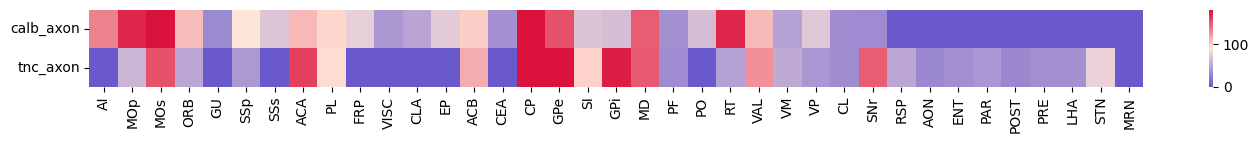

In [11]:
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap
calb_axon_len = calb_axon_screen.sum(axis=1).to_frame(name='calb_axon')
tnc_axon_len = tnc_axon_screen.sum(axis=1).to_frame(name='tnc_axon')
calb_terminal_num = calb_terminal_screen.sum(axis=1).to_frame(name='calb_terminal')
tnc_terminal_num = tnc_terminal_screen.sum(axis=1).to_frame(name='tnc_terminal')
def rerange_data(df,target_order,fill_value=0):
    # 拷贝以免修改原始 df
    df = df.copy()

    # 找出缺失的行名
    missing_rows = [idx for idx in target_order if idx not in df.index]

    # 添加缺失行，值为 fill_value
    for row in missing_rows:
        df.loc[row] = [fill_value] * df.shape[1]

    # 重新排序行
    df = df.loc[target_order]

    return df
calb_axon_len=rerange_data(calb_axon_len,brainareas,0)
tnc_axon_len=rerange_data(tnc_axon_len,brainareas,0)
calb_terminal_num=rerange_data(calb_terminal_num,brainareas,0)
tnc_terminal_num=rerange_data(tnc_terminal_num,brainareas,0)

custom_colors = [
    (0.41, 0.35, 0.8),   # 蓝色
    (1.0, 0.9, 0.85),    # 白色
    (0.86, 0.07, 0.23)   # 粉红色
]
custom_cmap = LinearSegmentedColormap.from_list('blue_white_pink', custom_colors)

axon_two=pd.concat([calb_axon_len,tnc_axon_len],axis=1)
axon_two.index=axon_two.index.str.replace(r'\.right$', '', case=False, regex=True)
axon_two=axon_two.T
plt.figure(figsize=(17, 1))
sns.heatmap(axon_two, cmap=custom_cmap, vmin=0,vmax=180,cbar=True,annot=False)
# plt.savefig("D:/Figure/25/Figure3/axonheatmap.pdf", format='pdf')

<Axes: >

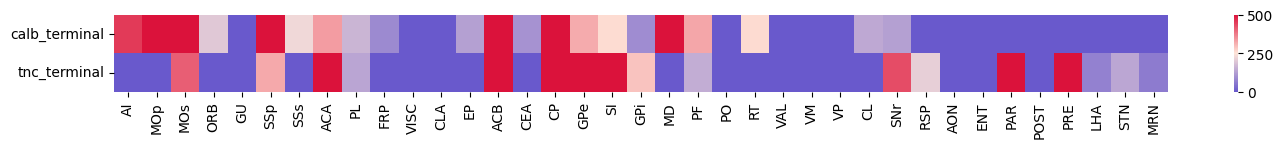

In [12]:

terminal_two=pd.concat([calb_terminal_num,tnc_terminal_num],axis=1)
terminal_two.index=terminal_two.index.str.replace(r'\.right$', '', case=False, regex=True)
terminal_two=terminal_two.T
plt.figure(figsize=(17, 1))
sns.heatmap(terminal_two, cmap=custom_cmap, vmin=0,vmax=500,cbar=True,annot=False)
# plt.savefig("D:/Figure/25/Figure3/terminalheatmap.pdf", format='pdf')

In [65]:
import pandas as pd

def filter_regions_by_mean(df, threshold=0.01):
    """
    去除总和不足均值一定比例的脑区（列）

    参数
    ----------
    df : pd.DataFrame
        行是神经元，列是脑区，值是投射强度
    threshold : float
        阈值比例（默认 0.01 = 1%）

    返回
    ----------
    df_filtered : pd.DataFrame
        过滤后的 DataFrame
    removed_regions : list
        被去掉的脑区名称
    """
    # 每个脑区的总和
    col_sums = df.sum(axis=0)

    # 所有脑区总和的均值
    mean_val = col_sums.mean()

    # 阈值
    cutoff = mean_val * threshold

    # 保留大于等于阈值的列
    keep_cols = col_sums[col_sums >= cutoff].index
    removed = col_sums[col_sums < cutoff].index.tolist()

    df_filtered = df[keep_cols]

    return df_filtered, removed

# 使用方法：
# df_filtered, removed = filter_regions_by_mean(df, threshold=0.01)
# print("去掉的脑区:", removed)


In [84]:
calbtnc_terminal_matrix=calbtnc_terminal_screen.T
calb_tnc_terminal_matrix=calbtnc_terminal_matrix.drop(columns=['PF.right'])
calb_tnc_terminal_filter,removed=filter_regions_by_mean(calb_tnc_terminal_matrix, threshold=0.05)
calb_tnc_terminal_filter

,MOp.right,MOs.right,ACA.right,ORB.right,PL.right,AI.right,RSP.right,SSp.right,SSs.right,AON.right,...,EP.right,CP.right,ACB.right,OT.right,GPe.right,GPi.right,SI.right,MD.right,RT.right,SNr.right
231628005.swc,10.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3683.0,0.0,0.0,833.0,22.0,0.0,0.0,0.0,28.0
231628007.swc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,19.0,1778.0,0.0,0.0,0.0,141.0,0.0,0.0,0.0
231628008.swc,0.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1665.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,9.0
231628011.swc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3760.0,0.0,0.0,47.0,12.0,0.0,6.0,0.0,10.0
231628012.swc,0.0,0.0,81.0,0.0,7.0,0.0,25.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221612076.swc,37.0,42.0,67.0,0.0,13.0,0.0,6.0,25.0,0.0,0.0,...,16.0,65.0,10.0,0.0,0.0,0.0,0.0,58.0,0.0,0.0
221612077.swc,0.0,372.0,20.0,0.0,17.0,8.0,0.0,0.0,0.0,0.0,...,0.0,21.0,0.0,0.0,0.0,0.0,0.0,68.0,11.0,0.0
221612078.swc,0.0,22.0,31.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,...,0.0,167.0,13.0,0.0,55.0,0.0,0.0,66.0,18.0,0.0
221612079.swc,0.0,134.0,0.0,0.0,17.0,12.0,0.0,0.0,0.0,0.0,...,23.0,210.0,0.0,0.0,0.0,0.0,0.0,51.0,33.0,0.0


In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

def cluster_heatmap_with_labels(df, savepath, method='average', cmap='coolwarm'):
    region_names = df.columns.tolist()
    
    # 相关性矩阵
    corr_matrix = df.corr().fillna(0.0)
    distance_matrix = 1 - np.abs(corr_matrix.values)

    # 层次聚类
    row_linkage = sch.linkage(distance_matrix, method=method)
    col_linkage = sch.linkage(distance_matrix.T, method=method)

    # dendrogram 顺序
    row_order = sch.dendrogram(row_linkage, no_plot=True)['leaves']
    col_order = sch.dendrogram(col_linkage, no_plot=True)['leaves']

    sorted_corr = corr_matrix.iloc[row_order, col_order]

    # 绘图
    fig = plt.figure(figsize=(10,10))

    # 左侧 dendrogram（不显示labels）
    ax_row = fig.add_axes([0.09,0.1,0.1,0.6])
    sch.dendrogram(
    row_linkage, orientation='left', no_labels=True,
    color_threshold=0, link_color_func=lambda k: 'k'
    )
    ax_row.set_xticks([])
    ax_row.set_yticks([])
    ax_row.invert_yaxis()

    # 上方 dendrogram（不显示labels）
    ax_col = fig.add_axes([0.3,0.71,0.6,0.1])
    sch.dendrogram(
    col_linkage, no_labels=True,
    color_threshold=0, link_color_func=lambda k: 'k'
    )
    ax_col.set_xticks([])
    ax_col.set_yticks([])

    # 热图（只显示热图边上的名字）
    ax_heat = fig.add_axes([0.3,0.1,0.6,0.6])
    sns.heatmap(sorted_corr, ax=ax_heat, cmap=cmap, cbar=True,
                xticklabels=[region_names[i] for i in col_order],
                yticklabels=[region_names[i] for i in row_order],vmin=-1,vmax=1)
    plt.setp(ax_heat.get_xticklabels(), rotation=90, ha='left')
    plt.setp(ax_heat.get_yticklabels(), rotation=0)

    # 保存
    plt.rcParams['pdf.fonttype'] = 42   # TrueType，可编辑
    plt.rcParams['ps.fonttype'] = 42    # 避免转成 Type3
    plt.savefig(savepath, format='pdf', bbox_inches='tight')
    plt.show()
    return sorted_corr, row_order, col_order


C:\Users\WQM\AppData\Local\Temp\ipykernel_63920\2420122891.py:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_linkage = sch.linkage(distance_matrix, method=method)
C:\Users\WQM\AppData\Local\Temp\ipykernel_63920\2420122891.py:16: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  col_linkage = sch.linkage(distance_matrix.T, method=method)


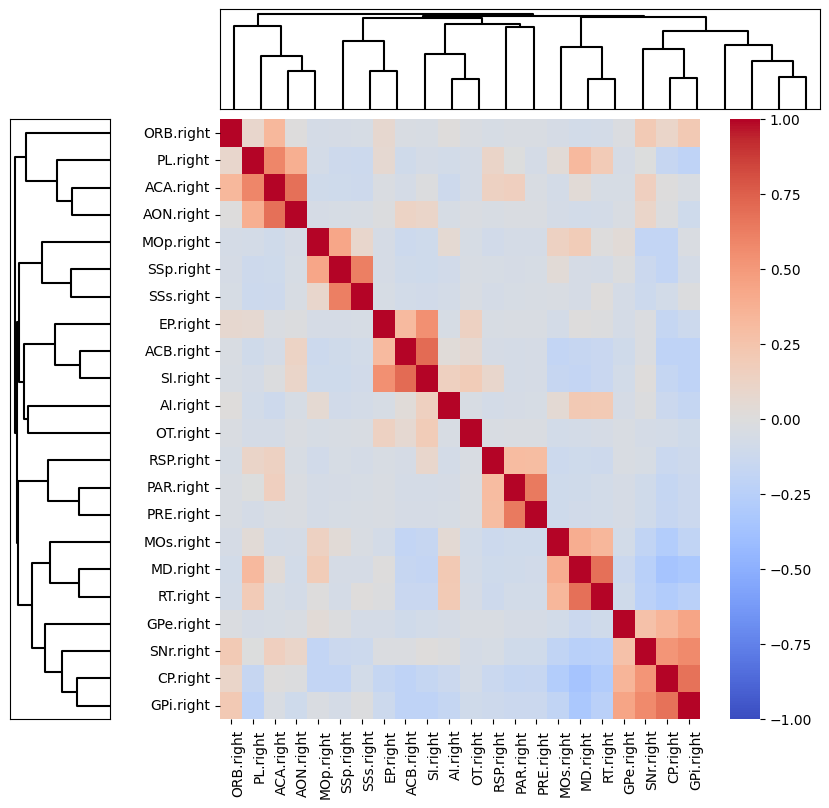

In [112]:

sorted_corr, order, col_order = cluster_heatmap_with_labels(calb_tnc_terminal_filter,savepath="D:/Figure/25/Figure3/correlationmap.pdf")